# Testing embedded method on lassoCV


https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

# Testing embedded method on lasso

In [52]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy as sp
from joblib import dump

In [2]:
df = pd.read_csv("Project_finaldata.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 224 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(29), int64(195)
memory usage: 4.5 MB


In [4]:
df.head()

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Bldg Type,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,0.0,0.0,6.0,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,11622,0.0,0.0,5.0,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,81.0,14267,0.0,0.0,6.0,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,20,93.0,11160,0.0,0.0,7.0,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,60,74.0,13830,0.0,0.0,5.0,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
c = df.corr().abs()

In [6]:
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [7]:
so.head(15)

Garage Type_CarPort   Lot Area                0.000003
Lot Area              Garage Type_CarPort     0.000003
Heating_GasA          Yr Sold                 0.000018
Yr Sold               Heating_GasA            0.000018
Bsmt Full Bath        Exterior 1st_VinylSd    0.000020
Exterior 1st_VinylSd  Bsmt Full Bath          0.000020
Neighborhood_NWAmes   Bsmt Cond               0.000024
Bsmt Cond             Neighborhood_NWAmes     0.000024
Yr Sold               Exterior 2nd_Wd Shng    0.000024
Exterior 2nd_Wd Shng  Yr Sold                 0.000024
Lot Area              Foundation_Wood         0.000046
Foundation_Wood       Lot Area                0.000046
Condition 1_Norm      Exterior 2nd_AsbShng    0.000046
Exterior 2nd_AsbShng  Condition 1_Norm        0.000046
Year Built            Condition 1_PosA        0.000059
dtype: float64

In [8]:
#Create  and y 
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [9]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
lasso_model = LassoCV()

In [11]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [12]:
pred_test_lasso = lasso_model.predict(X_test)

In [13]:
pred_test_lasso

array([211193.29598988, 214271.96077717, 141937.52754602, 352519.83390489,
       178905.38715282, 142026.27978925, 143544.7070387 , 197280.4977347 ,
       128790.39189718,  89698.74828762, 190783.37674839, 307064.1215821 ,
       122660.94264656, 103439.47521786, 181656.86632767, 102893.85418643,
       279395.60586718, 159377.74735229, 157245.58196731, 235385.43659122,
       218435.93707898,  73730.52965348, 264272.40667351, 121829.29367164,
       328519.83680731, 207032.53885129,  76557.66679631, 255639.89897214,
       204409.83217149, 183450.75514566,  55862.83441154, 203968.43106202,
       155425.54277252, 192506.18037597, 216241.09563096, 284593.64529021,
       331609.46114698, 143178.79985943, 158667.61555863, 209046.4377666 ,
        95774.59215058, 178543.13941319, 201654.69528159, 122548.48530998,
       178173.74705058, 206383.65198547, 195115.42110357, 134127.3062984 ,
       197263.08663303, 121639.38557955, 390179.2604883 , 211162.21672374,
       226678.42419697, 3

In [14]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [15]:
MAE_Lasso

15538.422078809685

In [16]:
MSE_Lasso

549475289.4879745

In [17]:
RMSE_Lasso

23440.88926401843

In [18]:
print("Best alpha using built-in LassoCV: %f" % lasso_model.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_model.score(X,y))
coef = pd.Series(lasso_model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 396.804078
Best score using built-in LassoCV: -2035687.474719


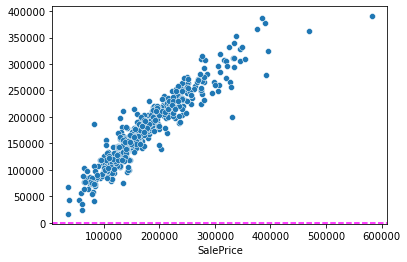

In [19]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

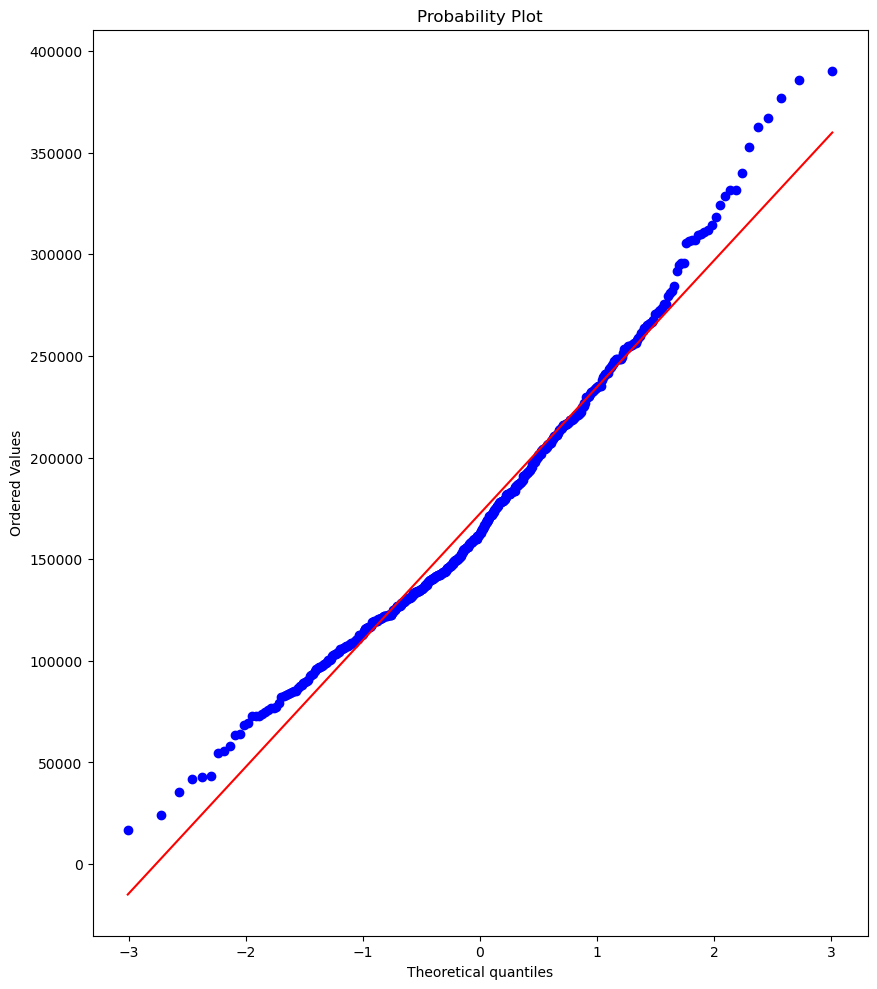

In [20]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

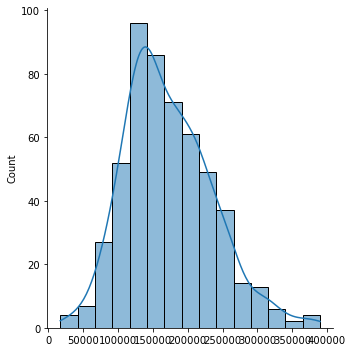

In [21]:
sns.displot(pred_test_lasso,bins=15,kde=True)

In [22]:
100*RMSE_Lasso/df['SalePrice'].mean()

13.461585139356789

# to find features with best correlation base on lasso

In [23]:
#this method based on correlation...it also removed saleprice

In [24]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 124217.176927
Best score using built-in LassoCV: 0.788160


In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 211 variables


In [26]:
np.where(coef != 0)

(array([ 2,  7,  8,  9, 16, 20, 24, 26, 39, 43, 44, 49], dtype=int64),)

In [27]:
df.columns[[2,7,8,9,16,20,24,26,39,43,44,49]]

Index(['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Misc Val'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Lasso Model')

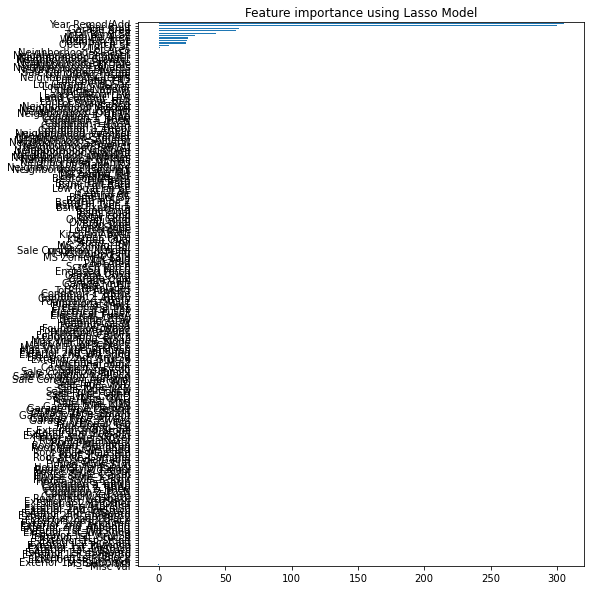

In [28]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [29]:
a = df.columns[[2,7,8,9,16,20,24,26,39,43,44,49]]

In [30]:
a

Index(['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Misc Val'],
      dtype='object')

In [31]:
x = reg.coef_
x

array([ -0.        ,   0.        ,   0.47948051,   0.        ,
        -0.        ,   0.        ,   0.        , 300.13052288,
       305.13449574,  27.03173862,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        20.91223727,   0.        ,  -0.        ,   0.        ,
        43.00205224,  -0.        ,   0.        ,   0.        ,
         7.56263191,  -0.        ,  58.47386063,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  60.15824166,
        -0.        ,   0.        ,   0.        ,  22.17604647,
        20.17028673,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.68178229,   0.        ,  -0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,  -0.  

In [32]:
np.where(x)

(array([ 2,  7,  8,  9, 16, 20, 24, 26, 39, 43, 44, 49], dtype=int64),)

# new model training with selected features

In [33]:
df =df[['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Misc Val','SalePrice']]

In [34]:
df

,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,2nd Flr SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Misc Val,SalePrice
0,31770,1960,1960,112.0,639.0,1080.0,0,1656,528.0,210,62,0,215000.0
1,11622,1961,1961,0.0,468.0,882.0,0,896,730.0,140,0,0,105000.0
2,14267,1958,1958,108.0,923.0,1329.0,0,1329,312.0,393,36,12500,172000.0
3,11160,1968,1968,0.0,1065.0,2110.0,0,2110,522.0,0,0,0,244000.0
4,13830,1997,1998,0.0,791.0,928.0,701,1629,482.0,212,34,0,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,7937,1984,1984,0.0,819.0,1003.0,0,1003,588.0,120,0,0,142500.0
2641,8885,1983,1983,0.0,301.0,864.0,0,902,484.0,164,0,0,131000.0
2642,10441,1992,1992,0.0,337.0,912.0,0,970,0.0,80,32,700,132000.0
2643,10010,1974,1975,0.0,1071.0,1389.0,0,1389,418.0,240,38,0,170000.0


In [35]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
lasso_model = LassoCV()

In [38]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [39]:
pred_test_lasso = lasso_model.predict(X_test)

In [40]:
pred_test_lasso

array([197777.93679802, 114805.90897493, 168635.19073532, 151382.76794265,
       159010.14092762, 194881.14367241, 130589.31953664, 184026.71746201,
       185789.36750323, 165471.01128104, 222415.52226815, 170048.52750972,
       254265.08879425, 104620.49770471, 185284.20958939, 249918.3926194 ,
        68452.24642434, 159509.14511852, 169098.84188823, 184550.8167654 ,
       124681.10338371, 132878.50498415, 292592.80723918, 161270.52048458,
       131890.40201703, 256744.88156966, 176614.40234706, 132797.52281768,
       116368.40153741, 196644.73573399, 239104.29150904, 237452.94663266,
       189101.34079304, 194165.52646248, 144885.4092767 , 108988.66162884,
       239906.55789117, 190274.08582772, 233632.39393431, 250004.44314393,
       154856.26447459, 117584.38989462, 111908.92702533, 115786.00168088,
       212472.5707124 , 124044.89955458, 228020.69307748, 212222.03804332,
       211639.86869408, 167541.48166971, 246141.15365493, 145515.80186249,
       136645.35947323, 1

In [41]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [42]:
MAE_Lasso

19949.83182122271

In [43]:
MSE_Lasso

811843623.2706803

In [44]:
RMSE_Lasso

28492.86969174359

In [45]:
print("Best alpha using built-in LassoCV: %f" % lasso_model.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_model.score(X,y))
coef = pd.Series(lasso_model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 459.811236
Best score using built-in LassoCV: -4824452.179044


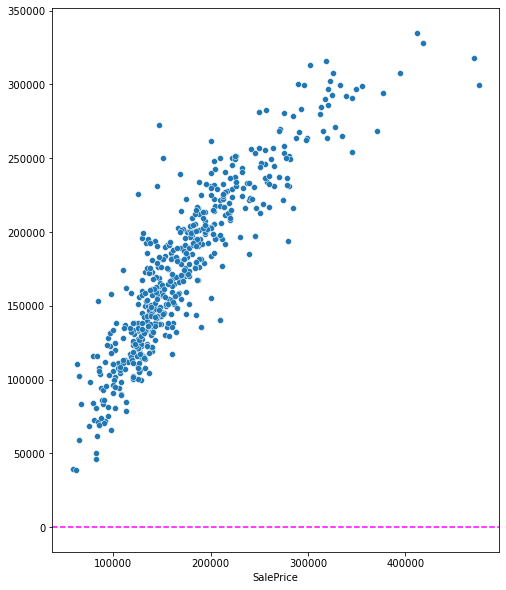

In [46]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

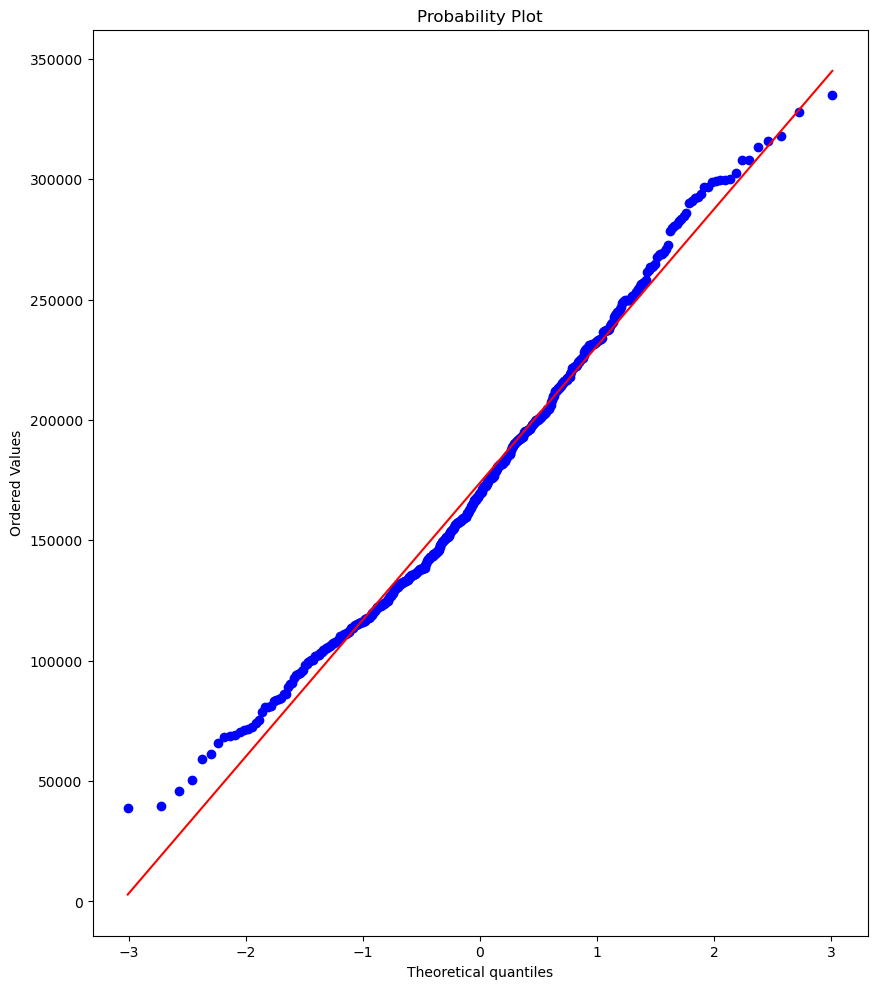

In [47]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

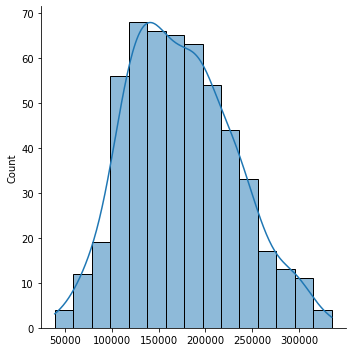

In [48]:
sns.displot(pred_test_lasso,bins=15,kde=True)

In [49]:
100*RMSE_Lasso/df['SalePrice'].mean()

16.362825953397813

In [50]:
lasso_model.coef_

array([ 3.56139052e+03,  1.14689601e+04,  1.19544319e+04,  4.10903966e+03,
        7.84147577e+03,  1.23392241e+04,  4.74112412e+02,  2.67547121e+04,
        1.00547183e+04,  2.51688006e+03,  1.74370213e+03, -2.05798010e+01])

In [53]:
dump(scaler,"Ames_Housing_scaler(v2).pkl")

['Ames_Housing_scaler(v2).pkl']

In [56]:
dump(lasso_model,"Ames_Housing_model(v2).h5")

['Ames_Housing_model(v2).h5']